# Question 2, Part A

In [2]:
import pandas as pd
accident = pd.read_csv("D:/All Python/All_Big_raw_Data/ITS/WH1/Accident.csv")
accident

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),...,Speed_limit,Junction_Control,Unnamed: 16,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,201201BS70001,-0.169101,51.493429,3,2,1,19/01/2012,5,20:35,12,...,30,Automatic traffic signal,NaN,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes
1,201201BS70002,-0.200838,51.517931,3,2,1,4/1/2012,4,17:00,1,...,30,Giveway or uncontrolled,NaN,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes
2,201201BS70003,-0.188636,51.487618,3,2,1,10/1/2012,3,10:07,12,...,30,Giveway or uncontrolled,NaN,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,1,Yes
3,201201BS70004,-0.200259,51.514325,3,1,1,18/01/2012,4,12:20,12,...,30,Giveway or uncontrolled,NaN,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1,Yes
4,201201BS70005,-0.183773,51.497614,3,1,1,17/01/2012,3,20:24,12,...,30,Giveway or uncontrolled,NaN,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,2.01E+12,-3.417278,55.264773,2,2,1,7/12/2014,1,22:20,917,...,70,NaN,NaN,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,2,Yes
464693,2.01E+12,-3.230255,55.054855,3,2,2,11/12/2014,5,06:40,917,...,70,NaN,NaN,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,2,Yes
464694,2.01E+12,-3.230826,54.985668,3,1,1,9/12/2014,3,02:00,917,...,40,NaN,NaN,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,2,Yes
464695,2.01E+12,-3.191397,54.990446,2,3,2,17/12/2014,4,06:55,917,...,60,Giveway or uncontrolled,NaN,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,2,Yes


In [3]:
import geopandas as gpd
district = gpd.read_file("Datasets_HW1/district.json")
district

,id,LAD13CD,LAD13CDO,LAD13NM,LAD13NMW,geometry
0,E06000001,E06000001,00EB,Hartlepool,NaN,"MULTIPOLYGON (((-1.24244 54.72219, -1.24162 54..."
1,E06000002,E06000002,00EC,Middlesbrough,NaN,"MULTIPOLYGON (((-1.19744 54.58184, -1.19416 54..."
2,E06000003,E06000003,00EE,Redcar and Cleveland,NaN,"MULTIPOLYGON (((-1.20071 54.57768, -1.19989 54..."
3,E06000004,E06000004,00EF,Stockton-on-Tees,NaN,"MULTIPOLYGON (((-1.28171 54.56460, -1.27762 54..."
4,E06000005,E06000005,00EH,Darlington,NaN,"POLYGON ((-1.43800 54.59493, -1.43554 54.59552..."
...,...,...,...,...,...,...
321,E09000029,E09000029,00BF,Sutton,NaN,"POLYGON ((-0.13456 51.39073, -0.13292 51.39013..."
322,E09000030,E09000030,00BG,Tower Hamlets,NaN,"POLYGON ((-0.01673 51.54356, -0.01591 51.54237..."
323,E09000031,E09000031,00BH,Waltham Forest,NaN,"POLYGON ((0.02172 51.62861, 0.02091 51.62920, ..."
324,E09000032,E09000032,00BJ,Wandsworth,NaN,"POLYGON ((-0.14028 51.41927, -0.14438 51.41749..."


In [4]:
# define some weights
accident_severity_weight = 0.5
number_of_vehicles_weight = 0.3
number_of_casualties_weight = 0.2

# Scale the data
accident["Accident_Severity_Scaled"] = accident["Accident_Severity"]/max(accident["Accident_Severity"])
accident["Number_of_Vehicles_Scaled"] = accident["Number_of_Vehicles"] / max(accident["Number_of_Vehicles"])
accident["Number_of_Casualties_Scaled"] = accident["Number_of_Casualties"] / max(accident["Number_of_Casualties"])

In [5]:
# make the score and append it to the dataframe
accident["Danger_Score"] = -accident["Accident_Severity_Scaled"]*accident_severity_weight + accident["Number_of_Vehicles_Scaled"]*number_of_vehicles_weight + accident["Number_of_Casualties_Scaled"]*number_of_casualties_weight
accident["Danger_Score"]


0        -0.488894
1        -0.488894
2        -0.488894
3        -0.493372
4        -0.493372
            ...   
464692   -0.322228
464693   -0.486744
464694   -0.493372
464695   -0.315599
464696   -0.486744
Name: Danger_Score, Length: 464697, dtype: float64

In [6]:
max(accident["Danger_Score"]), min(accident["Danger_Score"])

(0.11720430107526883, -0.4933718504252929)

In [7]:
import numpy as np
# make it to 5 slice, each one with different color
slices = np.linspace(min(accident["Danger_Score"]), max(accident["Danger_Score"]), num=7)
slices

array([-0.49337185, -0.39160916, -0.28984647, -0.18808377, -0.08632108,
        0.01544161,  0.1172043 ])

In [8]:
# make masks to split data
mask1 = ((slices[0] <= accident["Danger_Score"]).astype(int) + (accident["Danger_Score"] < slices[1]).astype(int))==2
mask2 = ((slices[1] <= accident["Danger_Score"]).astype(int) + (accident["Danger_Score"] < slices[2]).astype(int))==2
mask3 = ((slices[2] <= accident["Danger_Score"]).astype(int) + (accident["Danger_Score"] < slices[3]).astype(int))==2
mask4 = ((slices[3] <= accident["Danger_Score"]).astype(int) + (accident["Danger_Score"] <= slices[4]).astype(int))==2
mask5 = ((slices[4] <= accident["Danger_Score"]).astype(int) + (accident["Danger_Score"] <= slices[6]).astype(int))==2

In [9]:
import geopandas as gpd
# make all 5 groups in data
map_ = gpd.read_file("Datasets_HW1/district.json")

point1_ = gpd.GeoDataFrame(accident[mask1], geometry=gpd.points_from_xy(accident[mask1]["Longitude"], accident[mask1]["Latitude"]))
point2_ = gpd.GeoDataFrame(accident[mask2], geometry=gpd.points_from_xy(accident[mask2]["Longitude"], accident[mask2]["Latitude"]))
point3_ = gpd.GeoDataFrame(accident[mask3], geometry=gpd.points_from_xy(accident[mask3]["Longitude"], accident[mask3]["Latitude"]))
point4_ = gpd.GeoDataFrame(accident[mask4], geometry=gpd.points_from_xy(accident[mask4]["Longitude"], accident[mask4]["Latitude"]))
point5_ = gpd.GeoDataFrame(accident[mask5], geometry=gpd.points_from_xy(accident[mask5]["Longitude"], accident[mask5]["Latitude"]))
point1_within_map = gpd.sjoin(point1_, map_, predicate='within')
point2_within_map = gpd.sjoin(point2_, map_, predicate='within')
point3_within_map = gpd.sjoin(point3_, map_, predicate='within')
point4_within_map = gpd.sjoin(point4_, map_, predicate='within')
point5_within_map = gpd.sjoin(point5_, map_, predicate='within')

<Axes: >

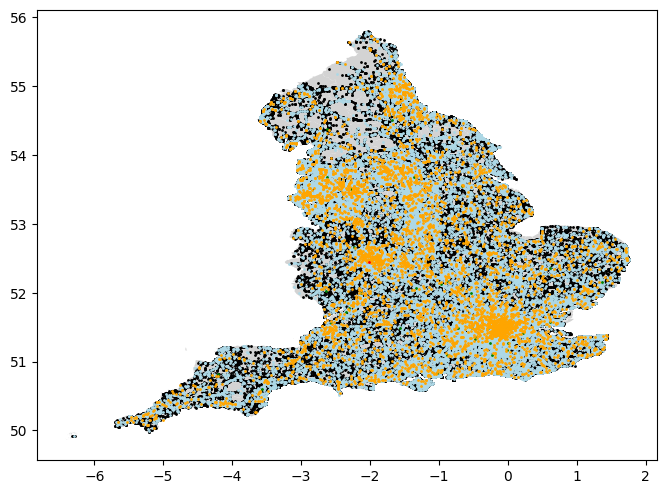

In [10]:
# plot it
import matplotlib.pyplot as plt
fig1, ax = plt.subplots(figsize=(8,8))
map_.plot(ax=ax, color="lightgrey")

point1_within_map.plot(ax=ax, markersize = 1, color="black")
point2_within_map.plot(ax=ax, markersize = 1, color="lightblue")
point3_within_map.plot(ax=ax, markersize = 1, color="green")
point4_within_map.plot(ax=ax, markersize = 1, color="orange")
point5_within_map.plot(ax=ax, markersize = 1, color="red")

# Modular Approach

In [11]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np


class Read_data:
    @staticmethod
    def read_csv(file:str) -> pd.DataFrame:
        return pd.read_csv(file)
    @staticmethod
    def read_map(file:str) -> gpd.GeoDataFrame:
        return gpd.read_file(file)


class Accidents:
    # define some weights
    accident_severity_weight = 0.5
    number_of_vehicles_weight = 0.3
    number_of_casualties_weight = 0.2
    
    def __init__(self, accidents, num_slice) -> None:

        self.accidents = accidents
        self.accidents = self._scale(self.accidents.copy())
        self.accidents["Danger_Score"] = self._score(self.accidents.copy())
        slice_ = self._slice(self.accidents, num_slice)
        self.points = self._split_data(self.accidents, slice_)

    def _scale(self, accident: pd.DataFrame) -> pd.DataFrame:
        # Scale the data
        accident["Accident_Severity_Scaled"] = accident["Accident_Severity"] / max(accident["Accident_Severity"])
        accident["Number_of_Vehicles_Scaled"] = accident["Number_of_Vehicles"] / max(accident["Number_of_Vehicles"])
        accident["Number_of_Casualties_Scaled"] = accident["Number_of_Casualties"] / max(accident["Number_of_Casualties"])
        return accident
    
    def _score(self, accident: pd.DataFrame) -> pd.DataFrame:
        return -accident["Accident_Severity_Scaled"]*Accidents.accident_severity_weight + accident["Number_of_Vehicles_Scaled"]*Accidents.number_of_vehicles_weight + accident["Number_of_Casualties_Scaled"]*Accidents.number_of_casualties_weight
    
    def _slice(self, accident: pd.DataFrame, n_slice: int) -> np.array:
        slice_ = np.linspace(min(accident["Danger_Score"]), max(accident["Danger_Score"]), num=n_slice)
        return slice_
        
    def _split_data(self, accident: pd.DataFrame, slice_: np.array) -> list:
        mask = []
        points = []
        for i in range(len(slice_)-1):
            if i == len(slice_-2):
                mask.append(((slice_[i] <= accident["Danger_Score"]).astype(int) + (accident["Danger_Score"] <= slice_[i+1]).astype(int))==2)
            else:
                mask.append(((slice_[i] <= accident["Danger_Score"]).astype(int) + (accident["Danger_Score"] < slice_[i+1]).astype(int))==2)
            
            points.append(gpd.GeoDataFrame(accident[mask[i]], geometry=gpd.points_from_xy(accident[mask[i]]["Longitude"], accident[mask[i]]["Latitude"])))
        return points


class Plot:
    def __init__(self) -> None:
        self.fig1, self.ax = plt.subplots(figsize=(8,8))
        
    def map_(self, data_map: gpd.GeoDataFrame) -> None:
        data_map.plot(ax=self.ax, color="lightgrey")
        
    def nodes(self, points: list, data_map: gpd.GeoDataFrame, color_kit: list):
        points = Plot._limit_to_map(data_map, points)
        for i in range(len(points)):
            points[i].plot(ax=self.ax, markersize=1, color=color_kit[i])
        
    @staticmethod
    def _limit_to_map(data_map: gpd.GeoDataFrame, points: list) -> list:
        for i in range(len(points)):
            points[i] = gpd.sjoin(points[i], data_map, predicate='within')
        return points

C:\Users\keipj\AppData\Local\Temp\ipykernel_14732\3620062202.py:67: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  points[i].plot(ax=self.ax, markersize=1, color=color_kit[i])


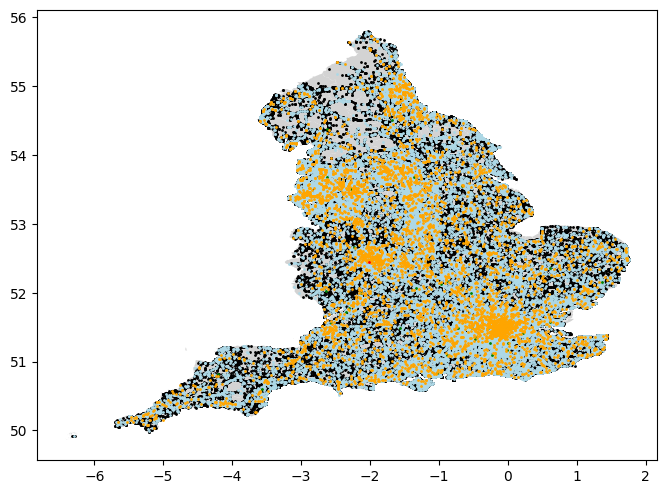

In [12]:
accidents = Read_data.read_csv("D:/All Python/All_Big_raw_Data/ITS/WH1/Accident.csv")
distance = Read_data.read_map("Datasets_HW1/district.json")
colors = ["black", "lightblue", "green", "orange", "red", "red"]

accident_update = Accidents(accidents=accidents, num_slice=7)

figure1 = Plot()
figure1.map_(distance)
figure1.nodes(accident_update.points, distance, colors)

# Question 2, Part B

In [13]:
accident

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Accident_Severity_Scaled,Number_of_Vehicles_Scaled,Number_of_Casualties_Scaled,Danger_Score
0,201201BS70001,-0.169101,51.493429,3,2,1,19/01/2012,5,20:35,12,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,1.000000,0.029851,0.010753,-0.488894
1,201201BS70002,-0.200838,51.517931,3,2,1,4/1/2012,4,17:00,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,1.000000,0.029851,0.010753,-0.488894
2,201201BS70003,-0.188636,51.487618,3,2,1,10/1/2012,3,10:07,12,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,1,Yes,1.000000,0.029851,0.010753,-0.488894
3,201201BS70004,-0.200259,51.514325,3,1,1,18/01/2012,4,12:20,12,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1,Yes,1.000000,0.014925,0.010753,-0.493372
4,201201BS70005,-0.183773,51.497614,3,1,1,17/01/2012,3,20:24,12,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,1.000000,0.014925,0.010753,-0.493372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,2.01E+12,-3.417278,55.264773,2,2,1,7/12/2014,1,22:20,917,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,2,Yes,0.666667,0.029851,0.010753,-0.322228
464693,2.01E+12,-3.230255,55.054855,3,2,2,11/12/2014,5,06:40,917,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,2,Yes,1.000000,0.029851,0.021505,-0.486744
464694,2.01E+12,-3.230826,54.985668,3,1,1,9/12/2014,3,02:00,917,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,2,Yes,1.000000,0.014925,0.010753,-0.493372
464695,2.01E+12,-3.191397,54.990446,2,3,2,17/12/2014,4,06:55,917,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,2,Yes,0.666667,0.044776,0.021505,-0.315599


In [188]:
class Time_Analysis:
    """Different analysis are here to analys the time of accidents"""
    def __init__(self, data) -> None:
        self.data = data
        self._time_day()
        self._time_month()
        self._time_year()

        
    def _time_day(self) -> None:
        data = pd.DataFrame({"day":self.data["day"], "Accident_Severity":self.data["Accident_Severity"], "time":self.data["Time_min"]})
        data = data.groupby("day").mean()
        self.day_data = data

        
    def _time_month(self) -> None:
        data = pd.DataFrame({"month":self.data["month"], "Accident_Severity":self.data["Accident_Severity"], "time":self.data["Time_min"]})
        data = data.groupby("month").mean()
        self.month_data = data

        
    def _time_year(self) -> None:
        data = pd.DataFrame({"year":self.data["year"], "Accident_Severity":self.data["Accident_Severity"], "time":self.data["Time_min"]})
        data = data.groupby("year").mean()
        self.year_data = data

    
    @staticmethod
    def add_time_to_min(data : pd.DataFrame) -> pd.DataFrame:
        """It will take a dataframe and add Time_min to it. The initial datafraim should contain "Time" label."""
        data_temp = data.copy()
        data_temp.dropna(subset=["Time"] ,inplace=True)
        data_temp["Time_min"] = data_temp["Time"].apply(lambda x: int((str(x).split(sep=":"))[0]) * 60 + int(str(x).split(sep=":")[1]))
        return data_temp

    
    @staticmethod
    def add_day_month_year(data: pd.DataFrame) -> pd.DataFrame:
        data["Date"] = pd.to_datetime(data["Date"])
        data["day"] = data["Date"].dt.day
        data["month"] = data["Date"].dt.month
        data["year"] = data["Date"].dt.year
        return data


    
class Print:
    @staticmethod
    def print_time_mean_according_to_months(data : pd.Series) -> None:
        months = "January, February, March, April, May, June, July, August, September, October, November, December".split(", ")
        for i in range(len(data)):
            print(f"Time: {data.iloc[i]} at month {i + 1} ({months[i]})")


    @staticmethod
    def print_time_mean_according_to_seasons(data : list) -> None:
        seasons = ["Spring", "Summer", "Fall", "Winter"]
        for i in range(len(data)):
            print(f"Time: {data[i]} at season {i + 1} ({seasons[i]})")


class Plot:
    def __init__(self, data : Time_Analysis, q : int) -> None:
        self.data = data
        if q == 1:
            self._time_day()
            self._time_month()
            self._time_year()
            self._show()
        elif q == 2:
            self._severity_day()
            self._severity_month()
            self._severity_year()
            self._show()
        
    def _time_day(self) -> None:
        fig, ax1 = plt.subplots()
        ax1.scatter(self.data.day_data.index, self.data.day_data["time"], marker=".")
        ax1.set_title("days of month")
        ax1.set_xlabel("Day")
        ax1.set_ylabel("time in min (min)")        
        
    def _time_month(self) -> None:
        months = "January, February, March, April, May, June, July, August, September, October, November, December".split(", ")
        fig, ax2 = plt.subplots()
        plt.scatter(months, self.data.month_data["time"], marker=".")
        ax2.set_title("months of year")
        ax2.set_xlabel("Month")
        ax2.set_ylabel("time in min (min)")

    def _time_year(self) -> None:
        fig, ax3 = plt.subplots()
        ax3.scatter(self.data.year_data.index, self.data.year_data["time"], marker=".")
        ax3.set_title("years")
        ax3.set_xlabel("Year")
        ax3.set_ylabel("time in min (min)")
        
    #____________________________________________________________________________________________________
    #____________________________________________________________________________________________________
    #____________________________________________________________________________________________________
    
    def _severity_day(self) -> None:
        fig, ax1 = plt.subplots()
        ax1.scatter(self.data.day_data.index, self.data.day_data["Accident_Severity"], marker=".")
        ax1.set_title("days of month")
        ax1.set_xlabel("Day")
        ax1.set_ylabel("Accident_Severity")        
        
    def _severity_month(self) -> None:
        months = "January, February, March, April, May, June, July, August, September, October, November, December".split(", ")
        fig, ax2 = plt.subplots()
        plt.scatter(months, self.data.month_data["Accident_Severity"], marker=".")
        ax2.set_title("months of year")
        ax2.set_xlabel("Month")
        ax2.set_ylabel("Accident_Severity")

    def _severity_year(self) -> None:
        fig, ax3 = plt.subplots()
        ax3.scatter(self.data.year_data.index, self.data.year_data["Accident_Severity"], marker=".")
        ax3.set_title("years")
        ax3.set_xlabel("Year")
        ax3.set_ylabel("Accident_Severity")

        
    def _show(self):
        plt.tight_layout()
        plt.show()

    


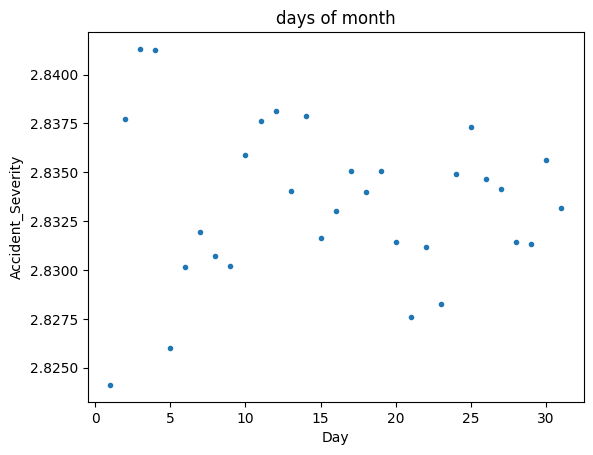

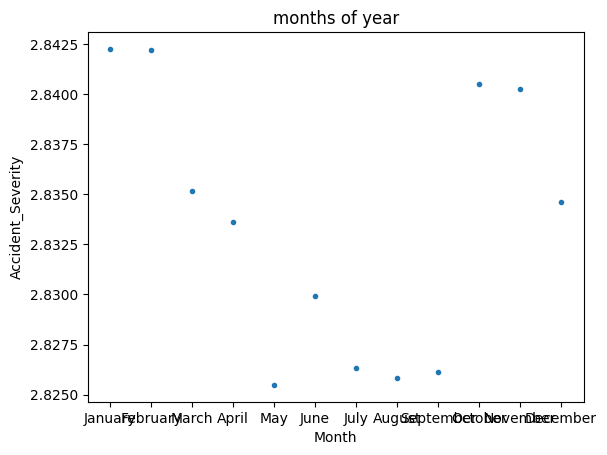

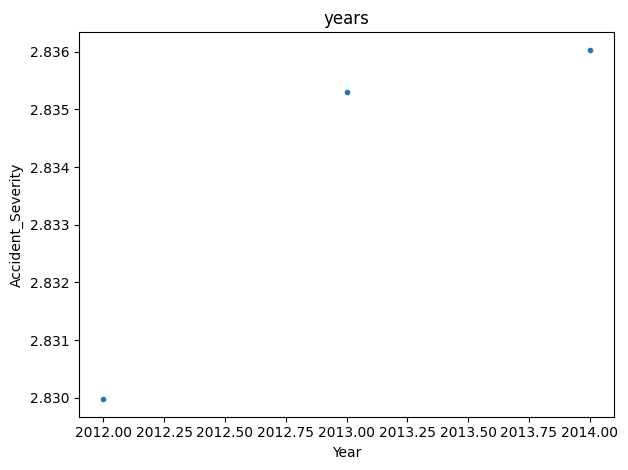

In [189]:
analys_data = Time_Analysis.add_time_to_min(accident)
analys_data = Time_Analysis.add_day_month_year(analys_data)

analysis_data = Time_Analysis(analys_data)

# For question 2 Part B
plotting_data = Plot(analysis_data, 1)
# For question 2 Part C
plotting_data = Plot(analysis_data, 2)


# Question 2, Part D

In [182]:
analys_data

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),...,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Accident_Severity_Scaled,Number_of_Vehicles_Scaled,Number_of_Casualties_Scaled,Danger_Score,Time_min,day,month,year
0,201201BS70001,-0.169101,51.493429,3,2,1,2012-01-19,5,20:35,12,...,1,Yes,1.000000,0.029851,0.010753,-0.488894,1235,19,1,2012
1,201201BS70002,-0.200838,51.517931,3,2,1,2012-01-04,4,17:00,1,...,1,Yes,1.000000,0.029851,0.010753,-0.488894,1020,4,1,2012
2,201201BS70003,-0.188636,51.487618,3,2,1,2012-01-10,3,10:07,12,...,1,Yes,1.000000,0.029851,0.010753,-0.488894,607,10,1,2012
3,201201BS70004,-0.200259,51.514325,3,1,1,2012-01-18,4,12:20,12,...,1,Yes,1.000000,0.014925,0.010753,-0.493372,740,18,1,2012
4,201201BS70005,-0.183773,51.497614,3,1,1,2012-01-17,3,20:24,12,...,1,Yes,1.000000,0.014925,0.010753,-0.493372,1224,17,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,2.01E+12,-3.417278,55.264773,2,2,1,2014-12-07,1,22:20,917,...,2,Yes,0.666667,0.029851,0.010753,-0.322228,1340,7,12,2014
464693,2.01E+12,-3.230255,55.054855,3,2,2,2014-12-11,5,06:40,917,...,2,Yes,1.000000,0.029851,0.021505,-0.486744,400,11,12,2014
464694,2.01E+12,-3.230826,54.985668,3,1,1,2014-12-09,3,02:00,917,...,2,Yes,1.000000,0.014925,0.010753,-0.493372,120,9,12,2014
464695,2.01E+12,-3.191397,54.990446,2,3,2,2014-12-17,4,06:55,917,...,2,Yes,0.666667,0.044776,0.021505,-0.315599,415,17,12,2014
